In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from catboost import CatBoostRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


- https://www.kaggle.com/competitions/playground-series-s3e14
- original: https://www.kaggle.com/datasets/shashwatwork/wild-blueberry-yield-prediction-dataset

Features Unit Description:
- Clonesize m2 The average blueberry clone size in the field
- Honeybee bees/m2/min Honeybee density in the field
- Bumbles bees/m2/min Bumblebee density in the field
- Andrena bees/m2/min Andrena bee density in the field
- Osmia bees/m2/min Osmia bee density in the field
- MaxOfUpperTRange ℃ The highest record of the upper band daily air temperature during the bloom season
- MinOfUpperTRange ℃ The lowest record of the upper band daily air temperature
- AverageOfUpperTRange ℃ The average of the upper band daily air temperature
- MaxOfLowerTRange ℃ The highest record of the lower band daily air temperature
- MinOfLowerTRange ℃ The lowest record of the lower band daily air temperature
- AverageOfLowerTRange ℃ The average of the lower band daily air temperature
- RainingDays Day The total number of days during the bloom season, each of which has precipitation larger than zero
- AverageRainingDays Day The average of raining days of the entire bloom season

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv')
df_orig = pd.read_csv('/kaggle/input/wild-blueberry-yield-prediction/Data in Brief/Data in Brief/WildBlueberryPollinationSimulationData.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')

In [3]:
df.head(3)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760


In [4]:
df_orig.head(3)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [6]:
df.nunique()

id                      15289
clonesize                   6
honeybee                    7
bumbles                    11
andrena                    16
osmia                      14
MaxOfUpperTRange            6
MinOfUpperTRange            5
AverageOfUpperTRange        5
MaxOfLowerTRange            6
MinOfLowerTRange            7
AverageOfLowerTRange        5
RainingDays                 6
AverageRainingDays          8
fruitset                 1526
fruitmass                1515
seeds                    2066
yield                     776
dtype: int64

### EDA

In [7]:
discrete_cols = [x for x in df.columns if len(df[x].unique()) < 17]

In [8]:
discrete_cols

['clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays']

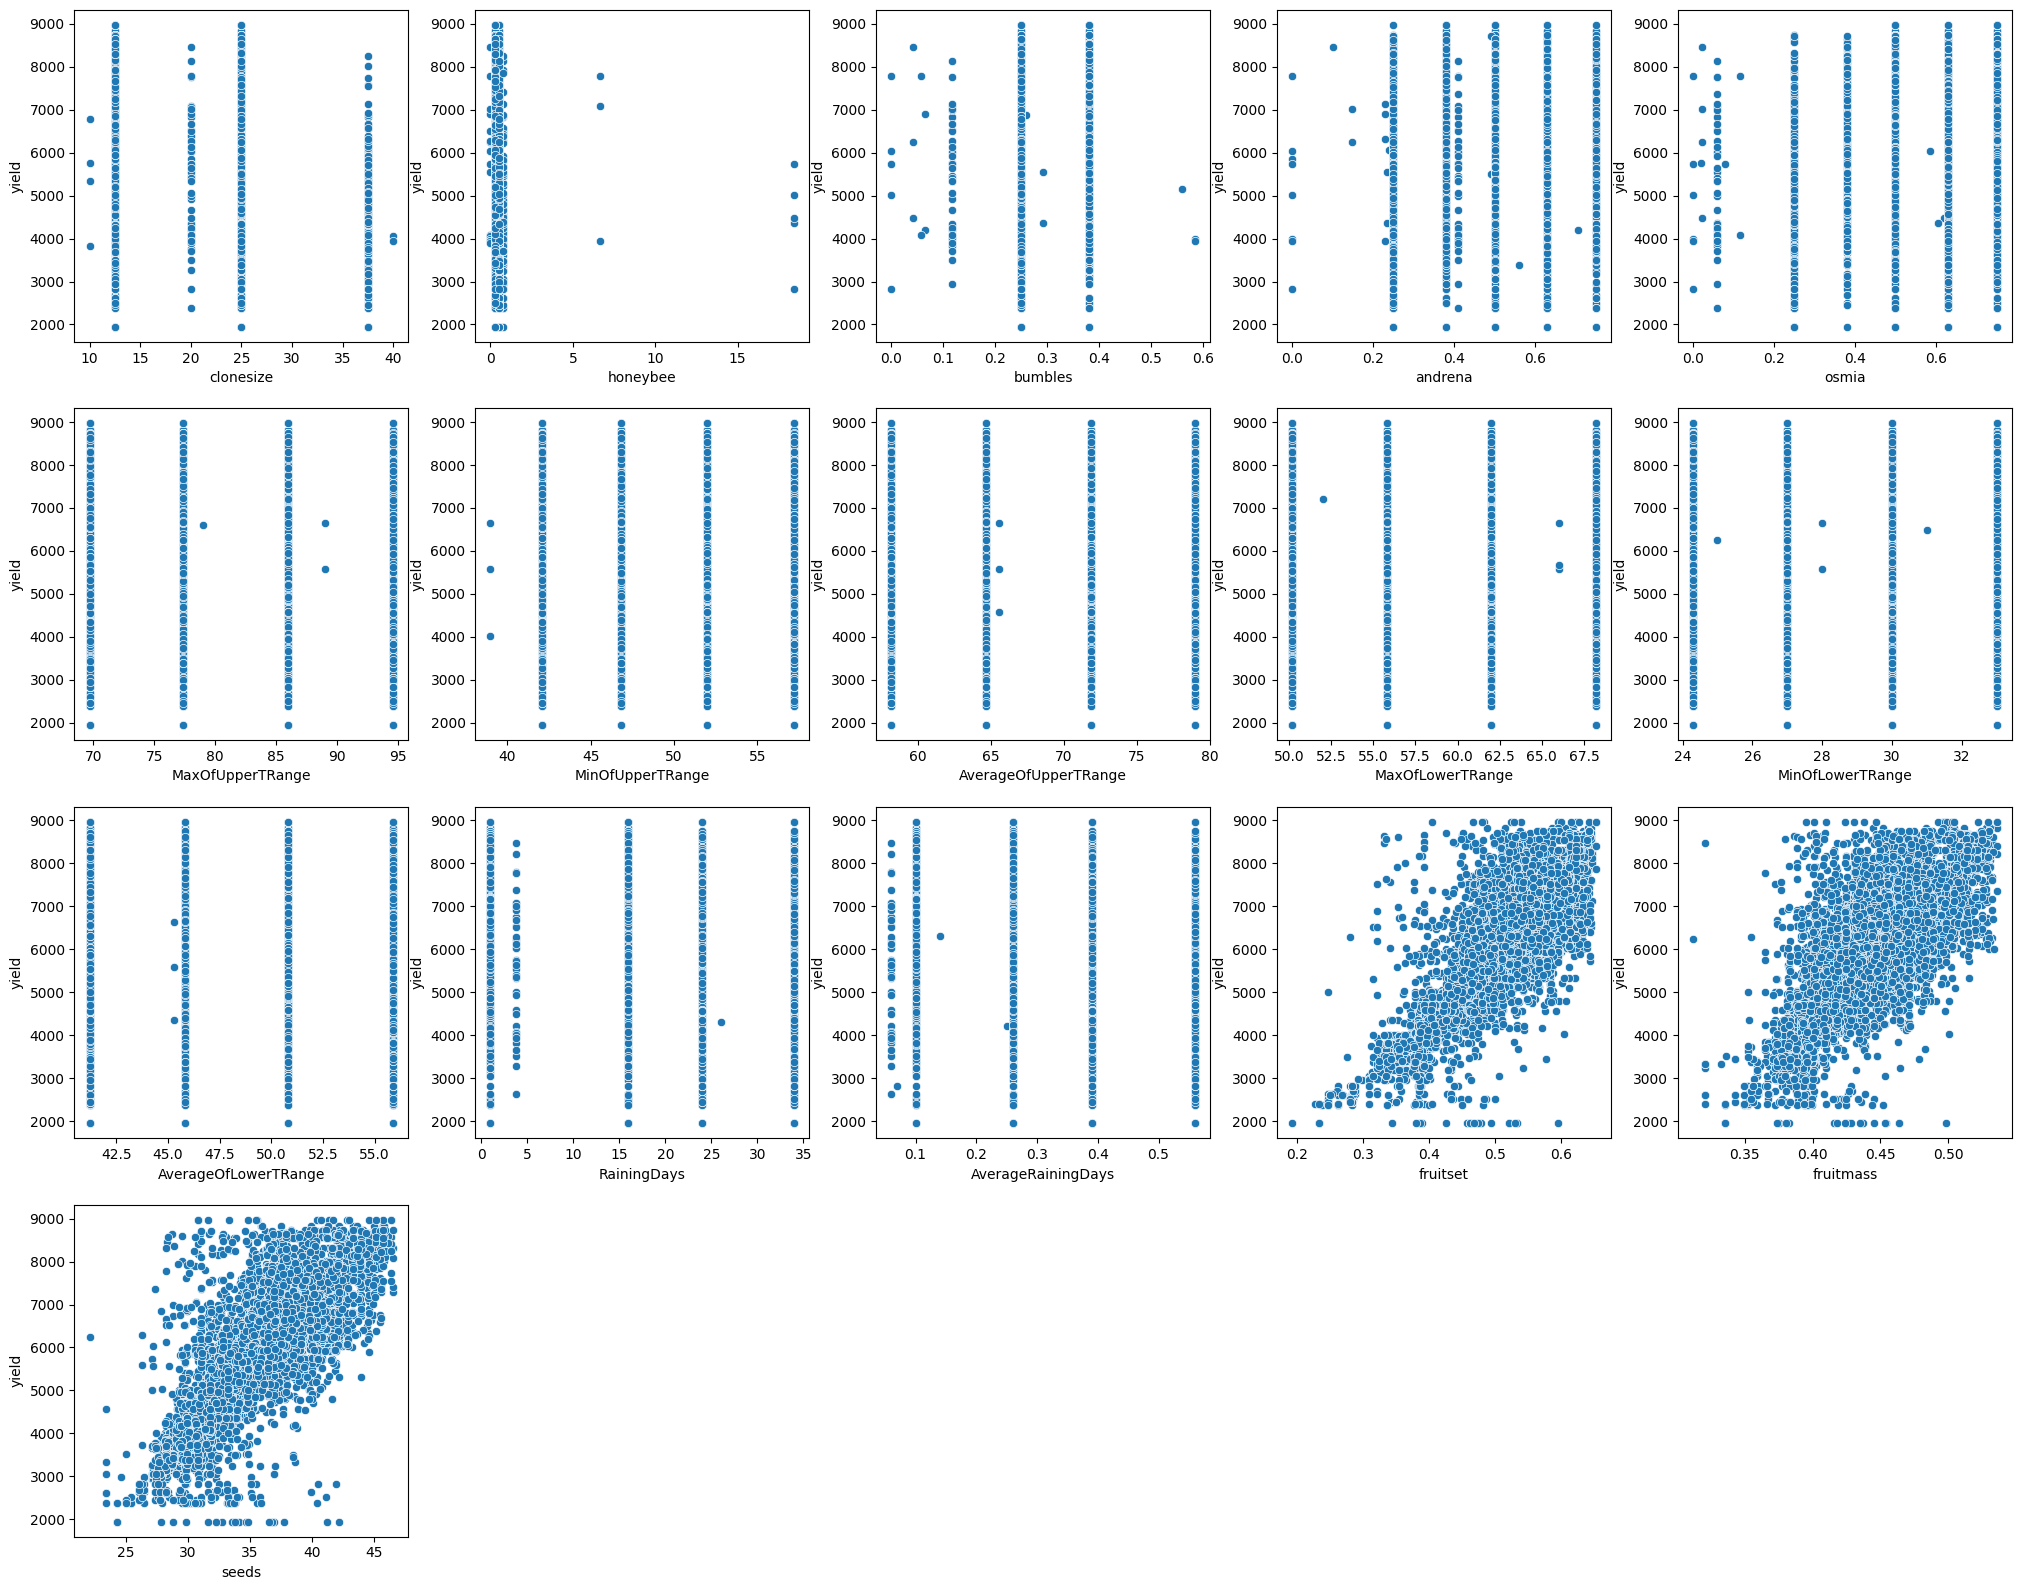

In [9]:
fig = plt.figure(figsize=(25,25))
n = 1
for column in df.columns:
    if column not in ['id', 'yield']:
        ax = plt.subplot(5,5,n)
        sns.scatterplot(data=df, x=column, y='yield')
        n += 1
plt.show()

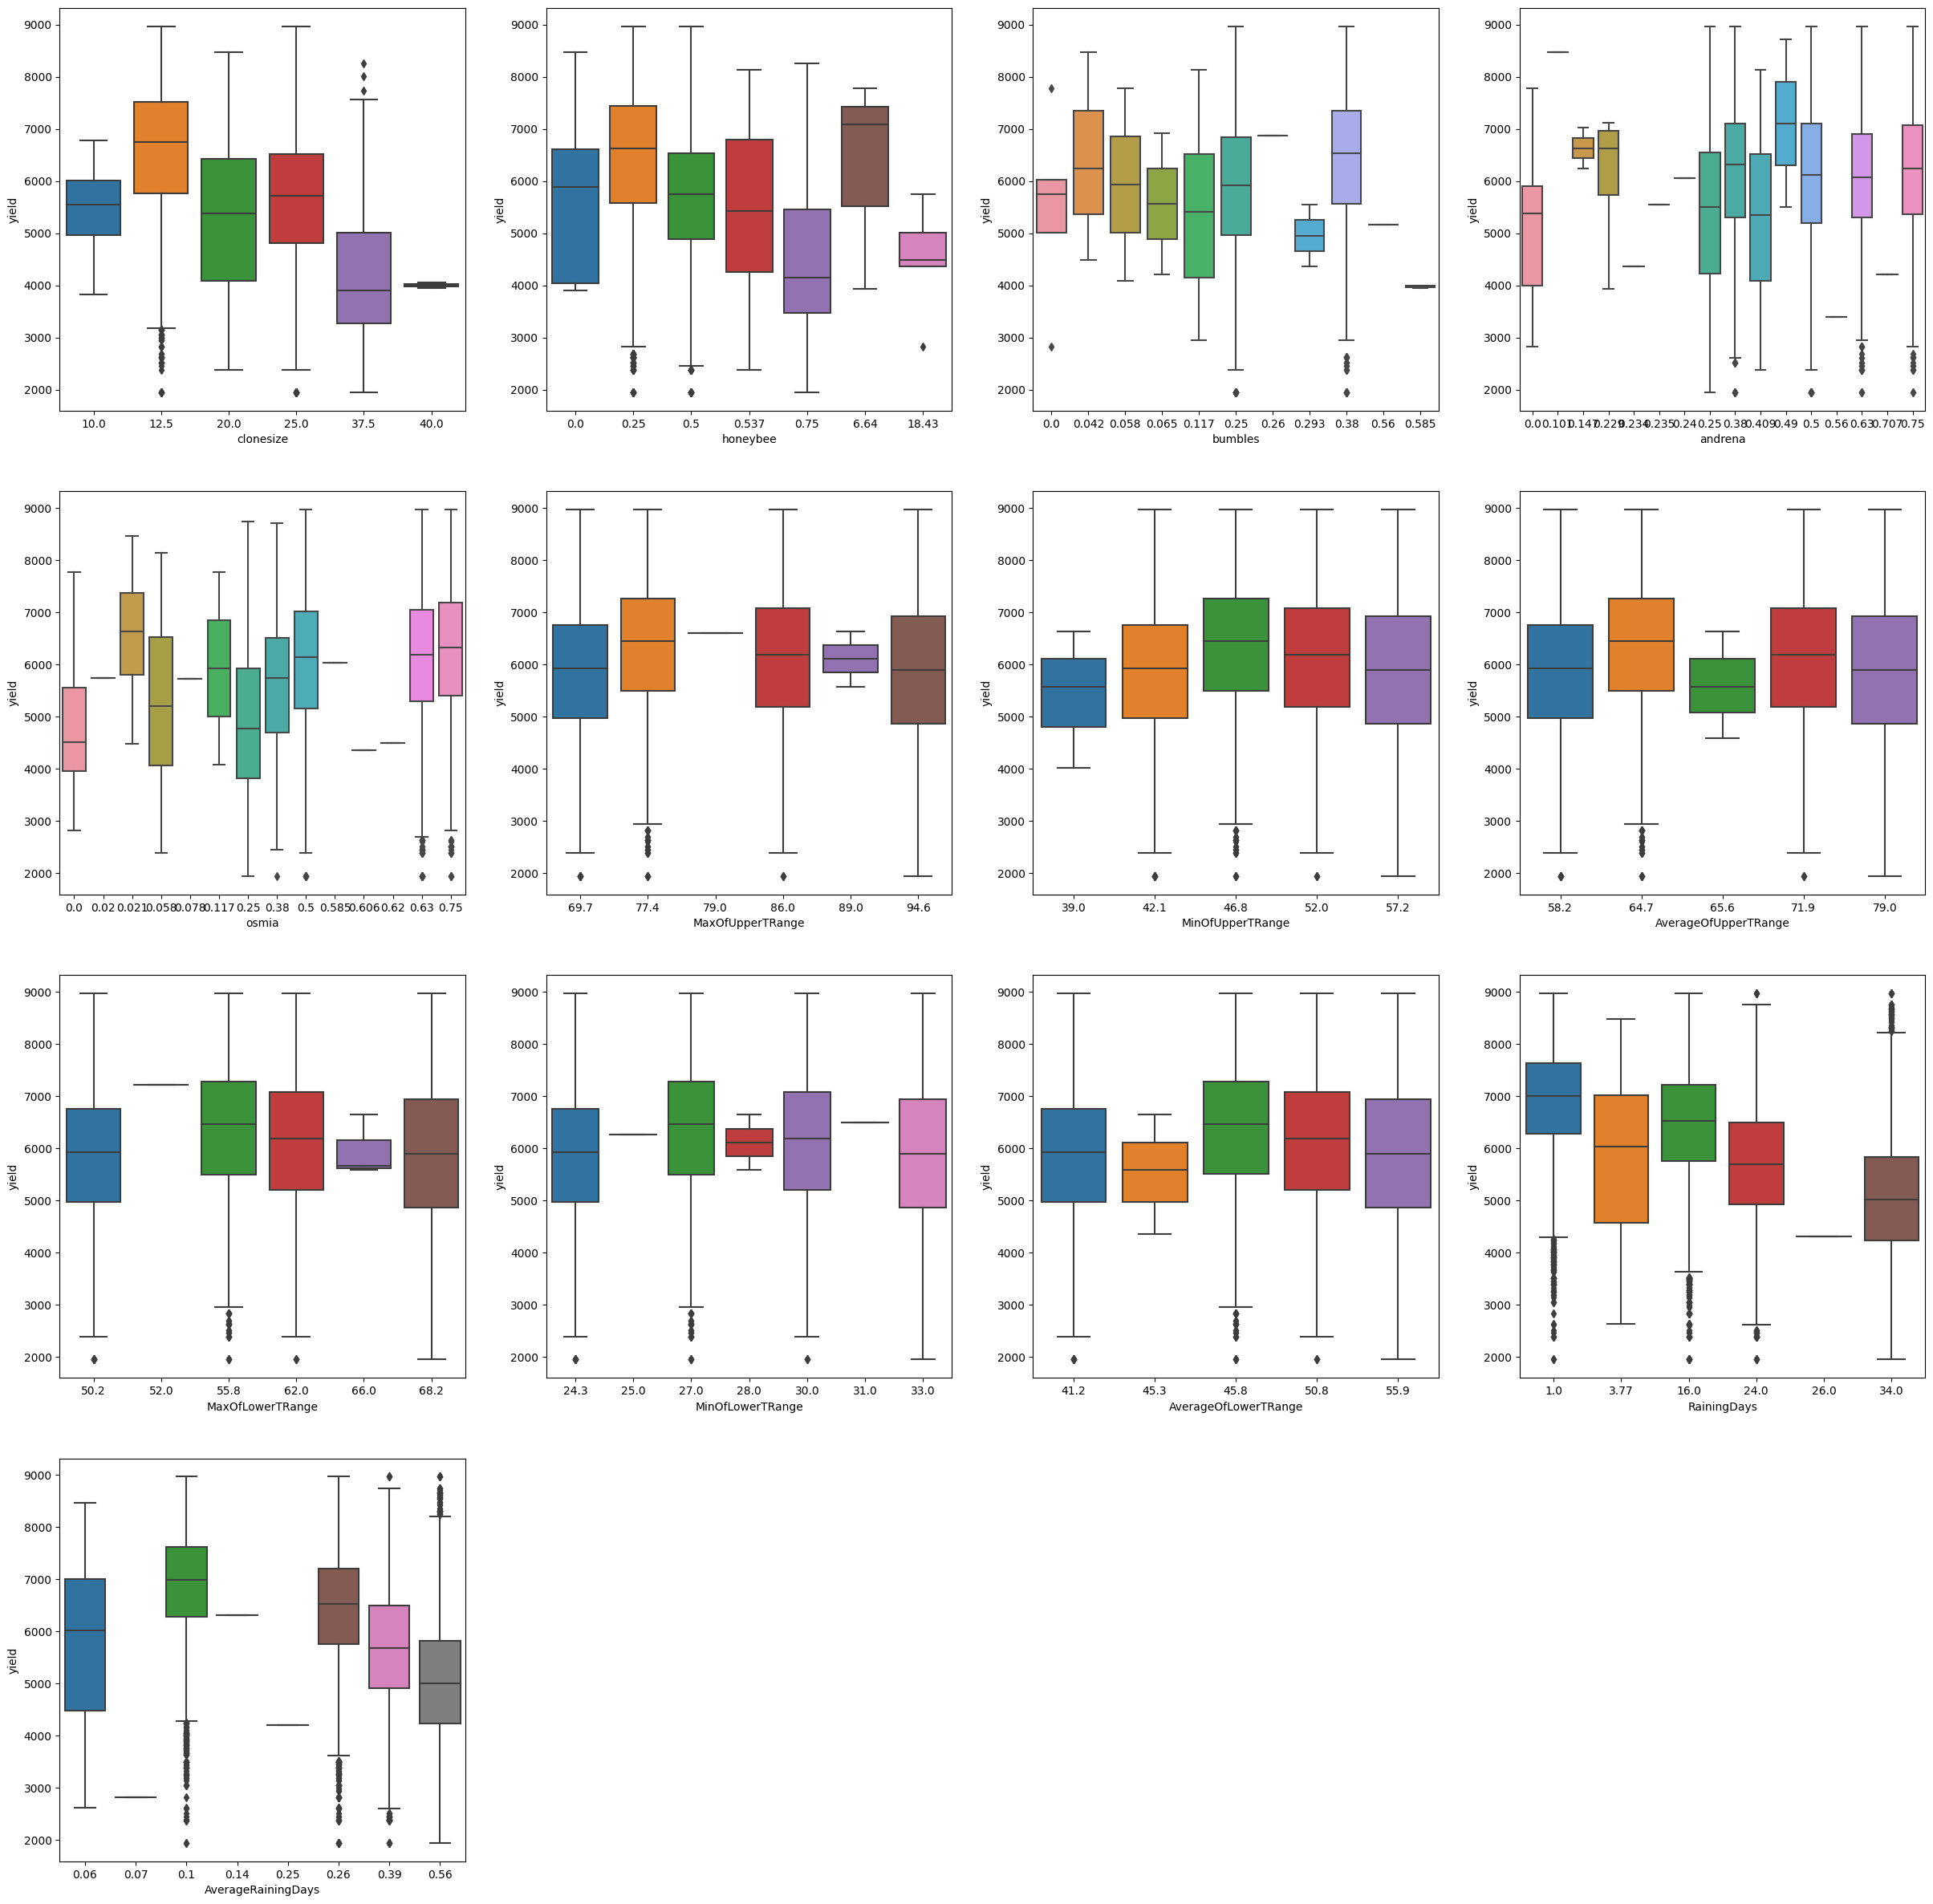

In [10]:
fig = plt.figure(figsize=(30,30))
n = 1
for column in discrete_cols:
    if column not in ['id', 'yield']:
        ax = plt.subplot(4,4,n)
        sns.boxplot(data=df, x=column, y="yield")
        n += 1
plt.show()

<AxesSubplot: >

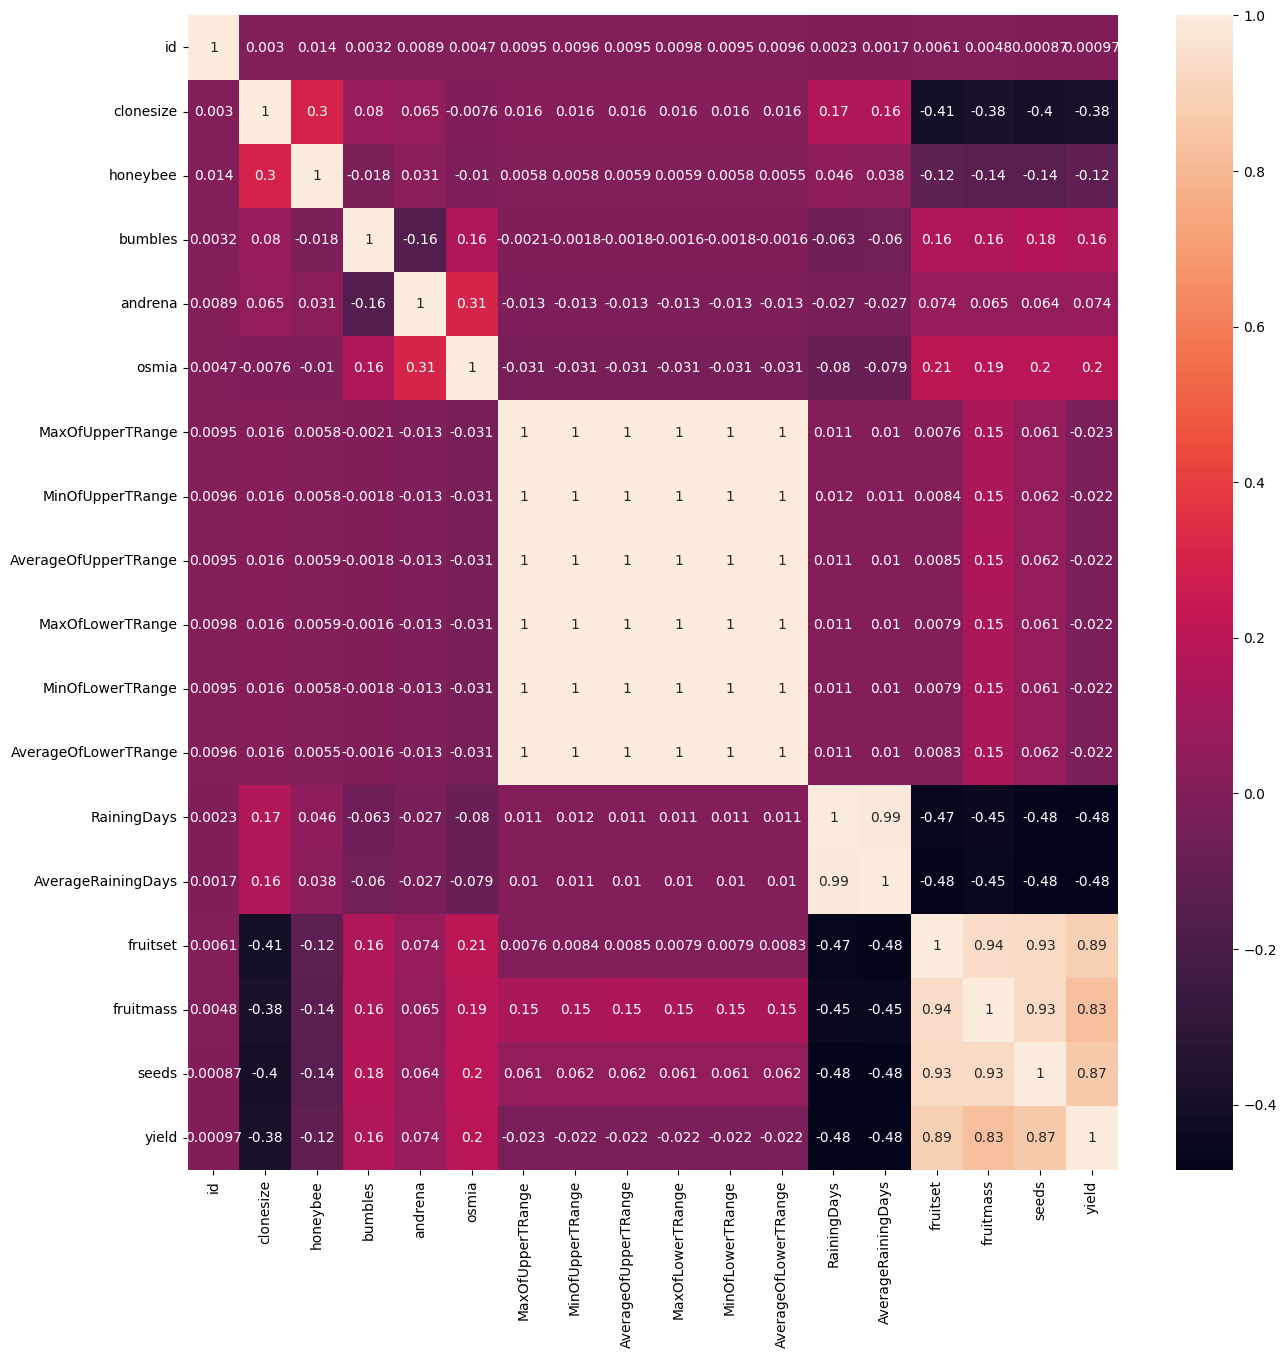

In [11]:
# df.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

### Baseline

In [12]:
cbr = CatBoostRegressor(random_state=0, silent=True)

In [13]:
cbr.fit(df.drop(['id','yield'],axis=1), df['yield'])

In [14]:
prediction = cbr.predict(df_orig.drop(['Row#','yield'],axis=1))

In [15]:
mean_absolute_error(df_orig['yield'], prediction)

161.3245180620008

### Feature Engineering

In [16]:
masked_corr_matrix = df.corr().mask(np.abs(df.corr()) <= 0.4)
correlated_cols = masked_corr_matrix[masked_corr_matrix['yield'].notna()].index

In [17]:
### grid search cv
df_correlated = df.copy()
y = df_correlated['yield']
df_correlated = df_correlated[correlated_cols].drop(['yield'], axis=1)

In [18]:
# Define the parameter grid for Grid Search
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8]
}

grid_search = GridSearchCV(estimator=cbr, param_grid=param_grid, cv=5)

# Fit the data to perform grid search
grid_search.fit(df_correlated, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}
Best Score: 0.8177338127077338


### Submission

In [19]:
sub = grid_search.predict(test.drop(['id'],axis=1))

In [20]:
submission = pd.DataFrame({'id':test['id'], 'yield':sub})

In [21]:
submission.to_csv('submission.csv', index=False)